Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


Reading the CSV file into a dataframe and exploring our dataset

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head()

,Age,Sex,Area of Residence,HbA1c,Height,Weight,BMI,Duration of disease,Other diease,Adequate Nutrition,...,Standardized birth weight,Autoantibodies,Impaired glucose metabolism,Insulin taken,How Taken,Family History affected in Type 1 Diabetes,Family History affected in Type 2 Diabetes,Hypoglycemis,pancreatic disease affected in child,Affected
0,greater then 15,Female,Suburban,Over 7.5%,1.50,56.0,24.888889,4y,no,No,...,Middle quartiles,Yes,Yes,Yes,Injection,Yes,No,Yes,Yes,yes
1,greater then 15,Female,Suburban,Over 7.5%,1.48,58.0,26.479182,1w,none,No,...,Middle quartiles,Yes,No,Yes,Injection,Yes,Yes,Yes,Yes,yes
2,Less then 11,Female,Urban,Over 7.5%,1.20,46.0,31.944444,9d,none,Yes,...,Middle quartiles,Yes,No,Yes,Injection,Yes,No,No,No,yes
3,Less then 15,Female,Suburban,Over 7.5%,1.65,50.0,18.365473,1w,none,Yes,...,Middle quartiles,No,No,Yes,Injection,No,Yes,No,No,yes
4,Less then 15,Female,Suburban,Over 7.5%,1.61,59.0,22.761468,1m,liver problem,Yes,...,Middle quartiles,Yes,No,Yes,Injection,Yes,Yes,No,No,yes


In [4]:
df.describe()

,Height,Weight,BMI
count,306.000000,306.000000,306.000000
mean,1.349346,38.854575,20.860711
std,0.277601,16.689427,6.225745
min,0.440000,5.000000,10.077936
25%,1.220000,25.000000,16.928286
50%,1.420000,40.000000,19.813209
75%,1.560000,50.000000,23.711124
max,1.830000,87.000000,61.983471


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         306 non-null    object 
 1   Sex                                         306 non-null    object 
 2   Area of Residence                           306 non-null    object 
 3   HbA1c                                       306 non-null    object 
 4   Height                                      306 non-null    float64
 5   Weight                                      306 non-null    float64
 6   BMI                                         306 non-null    float64
 7   Duration of disease                         306 non-null    object 
 8   Other diease                                306 non-null    object 
 9   Adequate Nutrition                          306 non-null    object 
 10  Education of M

Exploring the number of people affected with diabetes

No     154
yes    152
Name: Affected, dtype: int64


Text(0.5, 1.0, 'Diabetes Outcome')

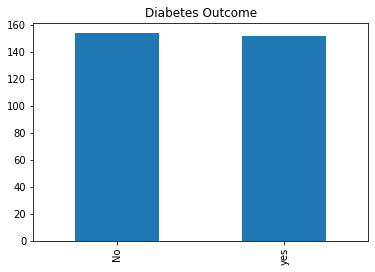

In [9]:
print(df.Affected.value_counts())
df['Affected'].value_counts().plot(kind='bar').set_title('Diabetes Outcome')

Dealing with duplicate and null values

In [10]:
print(df.isnull().values.sum())

0


In [11]:
df.shape

(306, 22)

In [12]:
df.duplicated(subset=None, keep='first').values.sum()

4

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated(subset=None, keep='first').values.sum()

0

In [15]:
df.shape

(302, 22)

We assume that the column name 'Hypoglycemis' had a typing error and is actually 'Hypoglycemia'. Hypoglycemia is a symptom in diabetes patients where blood sugar falls below normal. We hence rename it for our conveneince

In [16]:
df = df.rename(columns={"Hypoglycemis": "Hypoglycemia"})
df.head()

,Age,Sex,Area of Residence,HbA1c,Height,Weight,BMI,Duration of disease,Other diease,Adequate Nutrition,...,Standardized birth weight,Autoantibodies,Impaired glucose metabolism,Insulin taken,How Taken,Family History affected in Type 1 Diabetes,Family History affected in Type 2 Diabetes,Hypoglycemia,pancreatic disease affected in child,Affected
0,greater then 15,Female,Suburban,Over 7.5%,1.50,56.0,24.888889,4y,no,No,...,Middle quartiles,Yes,Yes,Yes,Injection,Yes,No,Yes,Yes,yes
1,greater then 15,Female,Suburban,Over 7.5%,1.48,58.0,26.479182,1w,none,No,...,Middle quartiles,Yes,No,Yes,Injection,Yes,Yes,Yes,Yes,yes
2,Less then 11,Female,Urban,Over 7.5%,1.20,46.0,31.944444,9d,none,Yes,...,Middle quartiles,Yes,No,Yes,Injection,Yes,No,No,No,yes
3,Less then 15,Female,Suburban,Over 7.5%,1.65,50.0,18.365473,1w,none,Yes,...,Middle quartiles,No,No,Yes,Injection,No,Yes,No,No,yes
4,Less then 15,Female,Suburban,Over 7.5%,1.61,59.0,22.761468,1m,liver problem,Yes,...,Middle quartiles,Yes,No,Yes,Injection,Yes,Yes,No,No,yes


'Other disease' column has a lot of variation in diseases, as shown below. In a dataset of approx 300 rows only, it will badly affect the prediction. As a result we have decided to remove 'other disease' as a feature 

In [17]:
df['Other diease'].unique()

array(['no', 'none', 'liver problem', 'heart, head problem',
       'ear problem', 'leg problem', 'eye problem', 'Thyroid problem',
       ' Allergic  problem', 'body pain', 'kidney, head pain ',
       'heartbeat problem', 'belly problem', 'heart problem', ' none',
       ' body pain', 'allergic problem', 'gastic,body pain', 'head pain',
       'Birth Defects', 'Head pain', 'fiver problem', 'head, body pain',
       'eye, health loss', 'pressure problem', 'fever', 'Thalassemia',
       'convulsion', 'eye, pain problem', 'body,head pain',
       'fever problem', 'skin problem', 'eye, cyrocities ', 'leg pain',
       'eye, screen problem', 'Brain, eye, hormon', 'teeth, eye problem',
       'kidny problem', 'eye, ear problem', 'eye, allergy'], dtype=object)

We have dropped height and weight because BMI itself is derived from those two and is sufficient
Features such as duration of disease, Insulin taken, how taken are not necessary since we are working on prediction
Other columns such as Area of residence, education of mother, etc. we believe are irrelevant
From the above dataframe, only the features below are selected for diabetes prediction

In [18]:
features = ['Age', 'HbA1c', 'BMI', 'Autoantibodies', 'Impaired glucose metabolism ', 'Family History affected in Type 1 Diabetes', 
            'Family History affected in Type 2 Diabetes', 'Hypoglycemia', 'pancreatic disease affected in child ', 'Affected']

Creating a dataframe with only required features

In [20]:
df1 = df[features]
df1.columns

Index(['Age', 'HbA1c', 'BMI', 'Autoantibodies', 'Impaired glucose metabolism ',
       'Family History affected in Type 1 Diabetes',
       'Family History affected in Type 2 Diabetes', 'Hypoglycemia',
       'pancreatic disease affected in child ', 'Affected'],
      dtype='object')

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 305
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         302 non-null    object 
 1   HbA1c                                       302 non-null    object 
 2   BMI                                         302 non-null    float64
 3   Autoantibodies                              302 non-null    object 
 4   Impaired glucose metabolism                 302 non-null    object 
 5   Family History affected in Type 1 Diabetes  302 non-null    object 
 6   Family History affected in Type 2 Diabetes  302 non-null    object 
 7   Hypoglycemia                                302 non-null    object 
 8   pancreatic disease affected in child        302 non-null    object 
 9   Affected                                    302 non-null    object 
dtypes: float64(1),

Since BMI is the only column of float type, we convert it to object type to keep symmetry by classifying the values into different categories of BMI values. Source: "https://www.researchgate.net/figure/WHO-body-mass-index-BMI-Classification-1_tbl1_236940946" 

In [22]:
bins = [0, 18.5, 25, 30, 35, 40, 100]
labels=['underweight','normal','overweight','obese I', 'obese II', 'obese III']
df1['BMI'] = pd.cut(df1.BMI, bins=bins, labels=labels)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Converting all the object data into categories using LabelEncoder to pass it through our classifiers

In [24]:
obj_features = ['Age', 'BMI', 'HbA1c', 'Autoantibodies', 'Impaired glucose metabolism ','Family History affected in Type 1 Diabetes','Family History affected in Type 2 Diabetes', 'Hypoglycemia','pancreatic disease affected in child ', 'Affected']

labelencoder = LabelEncoder()
for col in obj_features:
    df1[col] = labelencoder.fit_transform(df1[col])

df1.head()

F:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Age,HbA1c,BMI,Autoantibodies,Impaired glucose metabolism,Family History affected in Type 1 Diabetes,Family History affected in Type 2 Diabetes,Hypoglycemia,pancreatic disease affected in child,Affected
0,3,1,0,1,1,1,0,1,1,1
1,3,1,4,1,0,1,1,1,1,1
2,0,1,1,1,0,1,0,0,0,1
3,1,1,5,0,0,0,1,0,0,1
4,1,1,0,1,0,1,1,0,0,1


Our data is now ready for our models. We split the data with a test size ratio of 0.3 meaning 70% of the dataset will be training data and the other 30% will be test data

In [26]:
X = df1.drop('Affected',axis=1).values
y = df1['Affected'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

We first use a Random Forest Classifier and take the average of scores obtained by using n_estimators between 1 to 10

In [29]:
score = []
for i in range(1,10):
    clf=RandomForestClassifier(n_estimators=i,max_depth=5,random_state=13)
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    scr=clf.score(X_test,y_test)
    print(scr)

0.967032967032967
0.945054945054945
0.967032967032967
0.989010989010989
0.989010989010989
0.989010989010989
0.989010989010989
0.989010989010989
0.978021978021978


We choose n_estimators=5 to perform 5-fold cross validation. We also obtain the confusion matrix and classification report

In [32]:
clf2 = RandomForestClassifier(n_estimators=5,max_depth=5,random_state=13)
cv_results = cross_val_score(clf2, X, y, cv=5)

print('CV_results:', cv_results)
print('Mean cv_results:', np.mean(cv_results))

# Fit the classifier to the training data
clf2.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred_clf2 = clf.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_clf2))
print(classification_report(y_test, y_pred_clf2))

CV_results: [1.         0.96721311 0.98333333 0.95       1.        ]
Mean cv_results: 0.9801092896174863
[[44  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        44
           1       1.00      0.96      0.98        47

    accuracy                           0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



We do a similar classification task on Decision Tree Classifier and obtain the metrics for performance

In [33]:
clf3 = DecisionTreeClassifier(random_state=0)
cv_results2 = cross_val_score(clf3, X, y, cv=5)

print('CV_results:', cv_results2)
print('Mean cv_results:', np.mean(cv_results2))

# Fit the classifier to the training data
clf3.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred_clf3 = clf3.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred_clf3))
print(classification_report(y_test, y_pred_clf3))

CV_results: [0.98360656 0.8852459  0.98333333 0.95       1.        ]
Mean cv_results: 0.9604371584699454
[[43  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.94      0.96        47

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91



To have a look into how the Decision Tree is performing, we tried to generate the tree itself and interpret the image

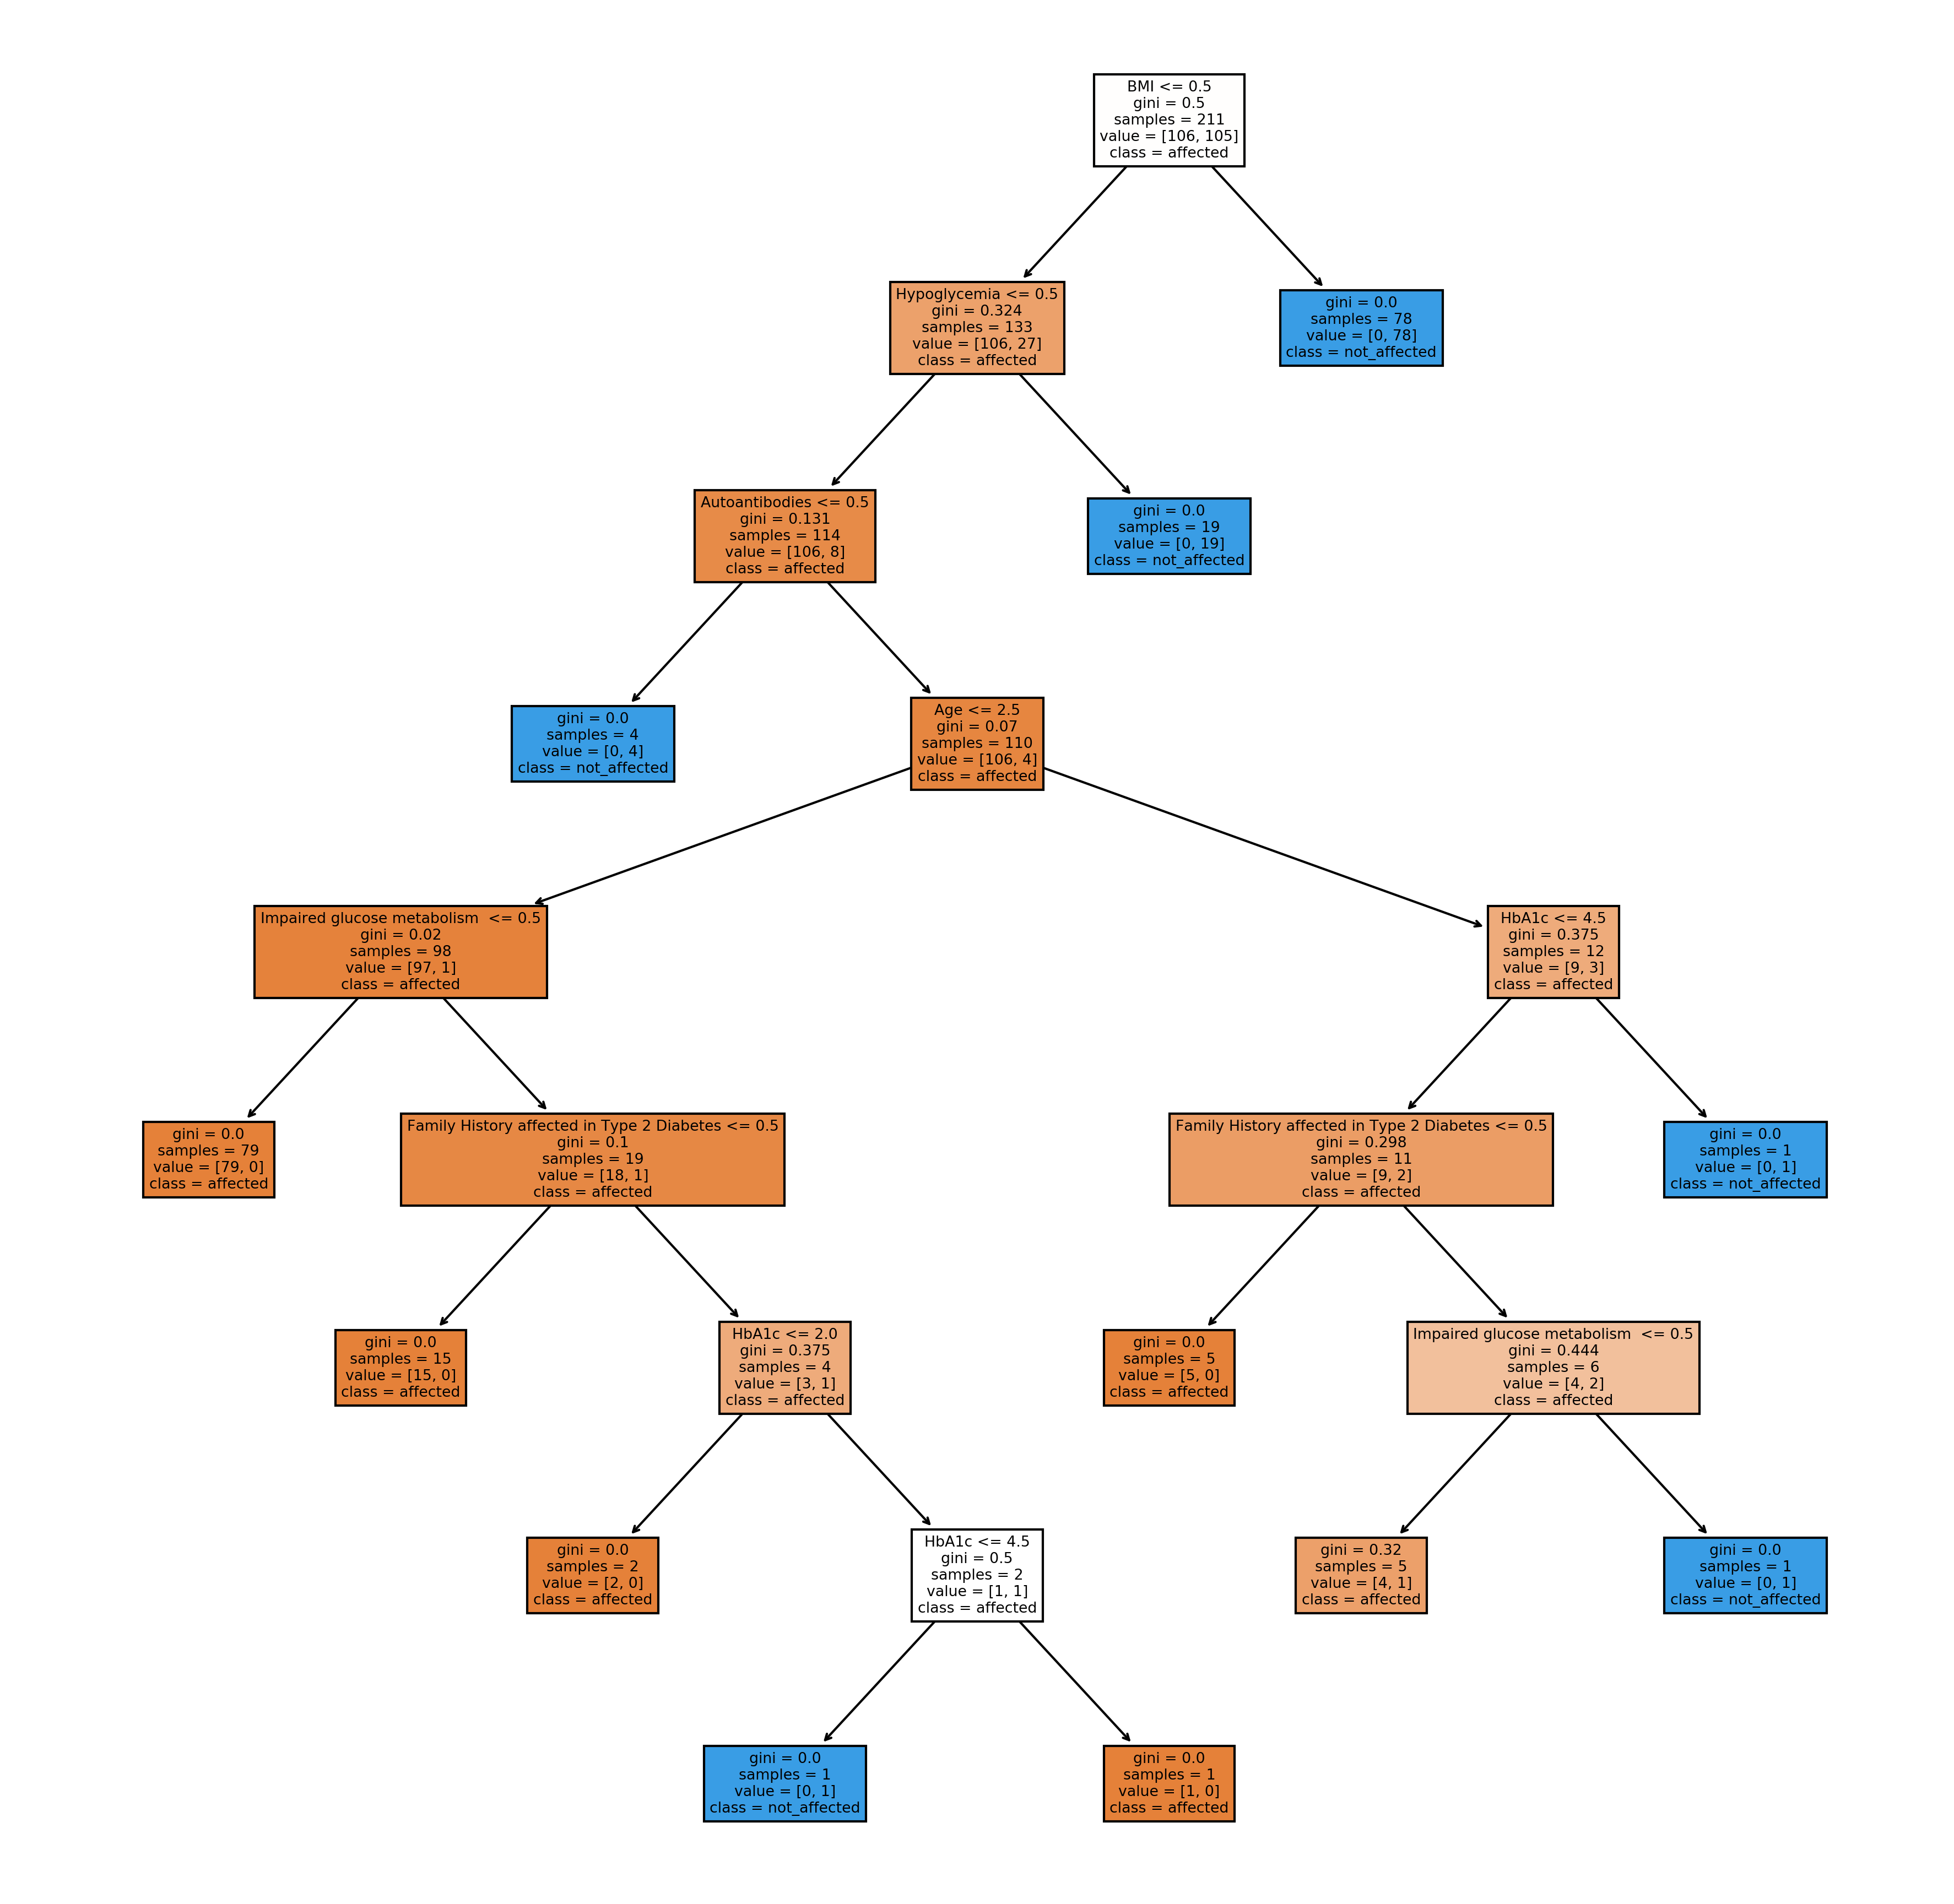

In [34]:
fn=['Age', 'BMI', 'HbA1c', 'Autoantibodies', 'Impaired glucose metabolism ','Family History affected in Type 1 Diabetes','Family History affected in Type 2 Diabetes', 'Hypoglycemia','pancreatic disease affected in child ']
cn=['affected', 'not_affected']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)
tree.plot_tree(clf3,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

Lastly, we also apply a Gaussian Naive Bayes Classifier for our prediction task, and explore the performance metrics

In [35]:
gnb = GaussianNB()

y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
score = gnb.score(X_test, y_test)
print("Score of the Naive Bayes Classifier:", score)

cv_results3 = cross_val_score(gnb, X, y, cv=5)
print('CV_results:', cv_results3)
print('Mean of cv_results:', np.mean(cv_results3))

print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

Score of the Naive Bayes Classifier: 0.967032967032967
CV_results: [1.         0.95081967 0.98333333 0.95       1.        ]
Mean cv_results: 0.9768306010928962
[[44  0]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      0.94      0.97        47

    accuracy                           0.97        91
   macro avg       0.97      0.97      0.97        91
weighted avg       0.97      0.97      0.97        91



The excellent scores for all the models may be due to our limitation of a small dataset of only 300 rows of data.

The dataset used contains data from research "Dataset on Significant Risk Factors for Type 1 Diabetes: A Bangladeshi Perspective"(https://www.researchgate.net/publication/328177385_Dataset_on_Significant_Risk_Factors_for_Type_1_Diabetes_A_Bangladeshi_Perspectivethe) and can be found at "https://www.kaggle.com/sabbir1996/dataset-of-diabetes-type1"

We  believe that a Decision tree, a Random Forest, or a Gaussian Naive Bayes Classifier can be successfully used for the prediction of diabetes as we have shown above, although the Random Forest Classifier seems to be the best choice of model with the best performance. By including other features known to have correletaion with diabetes such as high blood pressure, cholesterol levels, etc, we can create an even better model to successfully predict Diabetes in populations of Bangladesh as well as countries all around the world  
